## Installing PyCaret

In [ ]:
!pip install pycaret[full]

## Getting the Data

In [2]:
import pandas as pd

dataset = pd.read_csv('https://raw.githubusercontent.com/elvanselvano/purwadhika-final-project/main/dataset/df_clean_10.csv?token=AL27OTOPGHF7XLCQRLLGQNDA6PQEG')
dataset.drop('USECODE', axis=1, inplace=True)
dataset.head()

BATHRM  HF_BATHRM           HEAT  AC  ...  LANDAREA    WARD  SALEYEAR  RMDL
0       3          1  Hot Water Rad   1  ...      1627  Ward 2    2011.0     1
1       3          1      Warm Cool   1  ...      1815  Ward 2    2011.0     1
2       3          1      Warm Cool   1  ...      1424  Ward 2    2010.0     1
3       2          1     Forced Air   1  ...      2090  Ward 2    2012.0     1
4       2          1  Hot Water Rad   1  ...      2090  Ward 2    2012.0     1

[5 rows x 22 columns]

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23374 entries, 0 to 23373
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BATHRM      23374 non-null  int64  
 1   HF_BATHRM   23374 non-null  int64  
 2   HEAT        23374 non-null  object 
 3   AC          23374 non-null  int64  
 4   BEDRM       23374 non-null  int64  
 5   AYB         23374 non-null  float64
 6   EYB         23374 non-null  int64  
 7   PRICE       23374 non-null  float64
 8   GBA         23374 non-null  float64
 9   STYLE       23374 non-null  object 
 10  STRUCT      23374 non-null  object 
 11  GRADE       23374 non-null  object 
 12  CNDTN       23374 non-null  int64  
 13  EXTWALL     23374 non-null  object 
 14  ROOF        23374 non-null  object 
 15  INTWALL     23374 non-null  object 
 16  KITCHENS    23374 non-null  int64  
 17  FIREPLACES  23374 non-null  int64  
 18  LANDAREA    23374 non-null  int64  
 19  WARD        23374 non-nul

In order to evaluate the predictions on completely unseen data, a sample of 7012 records has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 7012 records were not available at the time when the machine learning experiment was performed.

In [4]:
dataset.shape

(23374, 22)

In [5]:
data = dataset.sample(frac=0.7, random_state=42)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (16362, 22)
Unseen Data For Predictions: (7012, 22)


## Setting up Environment in PyCaret

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment.

In [6]:
from pycaret.regression import *

In [7]:
regression_setup = setup(data=data, target='PRICE', session_id=42, use_gpu=True, 
                         categorical_features=['HEAT', 'STYLE', 'STRUCT', 'GRADE', 'EXTWALL', 'ROOF', 'INTWALL', 'WARD'],
                         numeric_features=['BATHRM', 'HF_BATHRM', 'AC', 'BEDRM', 'AYB', 'EYB', 'GBA', 'CNDTN', 'KITCHENS', 'FIREPLACES', 'LANDAREA', 'RMDL', 'SALEYEAR'])  

Description             Value
0                               session_id                42
1                                   Target             PRICE
2                            Original Data       (16362, 22)
3                           Missing Values             False
4                         Numeric Features                13
5                     Categorical Features                 8
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set      (11453, 111)
10                    Transformed Test Set       (4909, 111)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU              True
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              875b
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize             False
28                        Normalize Method              None
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42             Remove Perfect Collinearity              True
43                              Clustering             False
44                    Clustering Iteration              None
45                     Polynomial Features             False
46                       Polynomial Degree              None
47                    Trignometry Features             False
48                    Polynomial Threshold              None
49                          Group Features             False
50                       Feature Selection             False
51                Feature Selection Method           classic
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                        Transform Target             False
57                 Transform Target Method           box-cox

## Comparing All Models

When comparing models, we will create all models using 5 fold cross validation.

In [8]:
models = compare_models(fold=5)

Model           MAE           MSE  \
catboost               CatBoost Regressor  6.884512e+04  9.506108e+09   
lightgbm  Light Gradient Boosting Machine  7.299735e+04  1.044518e+10   
xgboost         Extreme Gradient Boosting  7.491380e+04  1.114127e+10   
et                  Extra Trees Regressor  7.559983e+04  1.162564e+10   
rf                Random Forest Regressor  7.784225e+04  1.215544e+10   
gbr           Gradient Boosting Regressor  8.174192e+04  1.248502e+10   
br                         Bayesian Ridge  8.796795e+04  1.418491e+10   
ridge                    Ridge Regression  8.800626e+04  1.419737e+10   
llar         Lasso Least Angle Regression  8.799880e+04  1.419917e+10   
lr                      Linear Regression  8.806060e+04  1.421940e+10   
lasso                    Lasso Regression  8.804261e+04  1.422452e+10   
omp           Orthogonal Matching Pursuit  1.027544e+05  1.877159e+10   
dt                Decision Tree Regressor  1.109232e+05  2.508252e+10   
huber                     Huber Regressor  1.272766e+05  2.765390e+10   
en                            Elastic Net  1.325363e+05  2.899536e+10   
ada                    AdaBoost Regressor  1.411423e+05  2.958574e+10   
knn                 K Neighbors Regressor  1.797179e+05  5.450047e+10   
par          Passive Aggressive Regressor  1.912332e+05  5.817501e+10   
lar                Least Angle Regression  2.200923e+25  2.754169e+54   

                  RMSE            R2   RMSLE          MAPE  TT (Sec)  
catboost  9.746691e+04  8.864000e-01  0.1638  1.214000e-01     2.876  
lightgbm  1.021654e+05  8.752000e-01  0.1722  1.294000e-01     0.218  
xgboost   1.055355e+05  8.668000e-01  0.1786  1.330000e-01     1.630  
et        1.077909e+05  8.611000e-01  0.1788  1.326000e-01     7.940  
rf        1.102135e+05  8.547000e-01  0.1825  1.375000e-01     7.714  
gbr       1.117038e+05  8.508000e-01  0.1898  1.459000e-01     2.126  
br        1.190570e+05  8.306000e-01  0.2471  1.610000e-01     0.182  
ridge     1.191091e+05  8.304000e-01  0.2473  1.610000e-01     0.040  
llar      1.191155e+05  8.304000e-01  0.2472  1.610000e-01     0.050  
lr        1.191997e+05  8.302000e-01  0.2483  1.613000e-01     0.080  
lasso     1.192238e+05  8.301000e-01  0.2476  1.611000e-01     0.716  
omp       1.369811e+05  7.757000e-01  0.2649  1.876000e-01     0.024  
dt        1.583322e+05  7.002000e-01  0.2575  1.893000e-01     0.144  
huber     1.662438e+05  6.691000e-01  0.2860  2.388000e-01     0.824  
en        1.702540e+05  6.535000e-01  0.2965  2.585000e-01     0.288  
ada       1.719437e+05  6.466000e-01  0.3373  3.146000e-01     0.990  
knn       2.334110e+05  3.487000e-01  0.3973  3.556000e-01     0.554  
par       2.408540e+05  3.041000e-01  0.4257  4.144000e-01     0.180  
lar       7.421818e+26 -3.258505e+43  9.9498  3.033407e+19     0.060

## Create a Model
Based on the above benchmark, we can see that CatBoost is the top performing model. Therefore, we will create a catboost model and tune its parameters in the next step.

In [9]:
catboost = create_model('catboost')

MAE           MSE         RMSE      R2   RMSLE    MAPE
0     70543.9478  9.607288e+09   98016.7724  0.8826  0.1607  0.1203
1     65860.6208  8.416075e+09   91739.1674  0.8934  0.1450  0.1104
2     69445.8306  9.826182e+09   99127.1019  0.8862  0.1555  0.1163
3     67044.9947  9.278552e+09   96325.2417  0.8878  0.1680  0.1194
4     68033.3105  8.869426e+09   94177.6305  0.8990  0.1654  0.1233
5     68731.8805  8.888443e+09   94278.5376  0.8860  0.1602  0.1199
6     70834.0795  1.114014e+10  105546.8660  0.8725  0.1719  0.1275
7     69970.4871  9.525733e+09   97599.8619  0.8909  0.1852  0.1351
8     69274.7721  1.008851e+10  100441.5987  0.8819  0.1719  0.1275
9     64546.5529  8.107762e+09   90043.1097  0.8997  0.1476  0.1106
Mean  68428.6477  9.374812e+09   96729.5888  0.8880  0.1631  0.1210
SD     1954.9070  8.325950e+08    4265.9422  0.0078  0.0114  0.0073

## Tuning the Model

In [10]:
tuned_catboost = tune_model(catboost, n_iter=100, optimize = 'MAE', search_library = 'optuna', early_stopping=True)

MAE           MSE         RMSE      R2   RMSLE    MAPE
0     70631.6442  9.719817e+09   98589.1324  0.8813  0.1619  0.1206
1     66075.1352  8.554138e+09   92488.5853  0.8916  0.1460  0.1107
2     69502.0090  9.985908e+09   99929.5173  0.8844  0.1560  0.1159
3     66918.4876  9.549441e+09   97721.2438  0.8845  0.1694  0.1188
4     67521.3130  8.977860e+09   94751.5676  0.8978  0.1659  0.1215
5     68859.0872  8.921605e+09   94454.2462  0.8855  0.1615  0.1202
6     69970.1736  1.110613e+10  105385.6428  0.8729  0.1721  0.1266
7     69644.3841  9.408218e+09   96995.9700  0.8923  0.1849  0.1358
8     68143.8576  1.003761e+10  100187.8968  0.8825  0.1704  0.1249
9     64285.0161  8.165962e+09   90365.7126  0.8990  0.1477  0.1093
Mean  68155.1108  9.442670e+09   97086.9515  0.8872  0.1636  0.1204
SD     1875.9082  8.007875e+08    4098.0075  0.0076  0.0111  0.0073

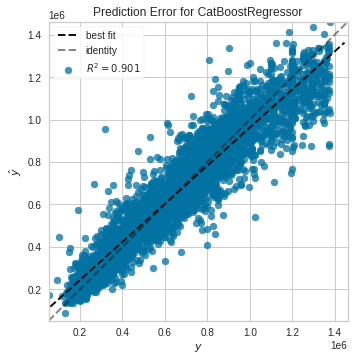

In [13]:
plot_model(tuned_catboost, plot = 'error')

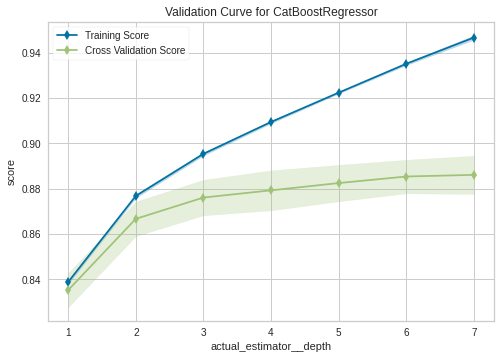

In [14]:
plot_model(tuned_catboost, plot = 'vc')

In [15]:
plot_model(tuned_catboost, plot = 'residuals_interactive')

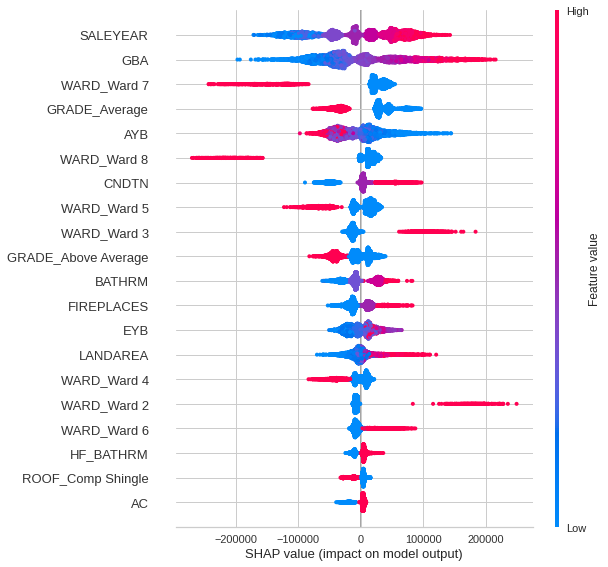

In [12]:
interpret_model(tuned_catboost)

## Finalize and save the model

In [16]:
final_model = finalize_model(tuned_catboost) # train using the whole training set

In [17]:
save_model(final_model, model_name='catboost_final')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['HEAT', 'STYLE',
                                                             'STRUCT', 'GRADE',
                                                             'EXTWALL', 'ROOF',
                                                             'INTWALL', 'WARD'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['BATHRM', 'HF_BATHRM',
                                                           'AC', 'BEDRM', 'AYB',
                                                           'EYB', 'GBA', 'CNDTN',
                                                           'KITCHENS',
                                                           'FIREPLACES',
                                                           'LANDAREA', 'RMDL',
    

## Predictions on unseen data

In [18]:
from pycaret.regression import load_model

saved_catboost = load_model('catboost_final')

Transformation Pipeline and Model Successfully Loaded


In [19]:
data_unseen_features = data_unseen.drop('PRICE', axis=1)
data_unseen_target = data_unseen['PRICE']
predictions = predict_model(saved_catboost, data=data_unseen_features)

In [20]:
predictions

BATHRM  HF_BATHRM           HEAT  ...  SALEYEAR  RMDL         Label
0          3          1      Warm Cool  ...    2011.0     1  1.121325e+06
1          3          0  Hot Water Rad  ...    2012.0     1  1.183272e+06
2          2          1      Warm Cool  ...    2013.0     1  9.779065e+05
3          3          1      Warm Cool  ...    2010.0     1  9.312238e+05
4          3          1  Hot Water Rad  ...    2018.0     1  1.292925e+06
...      ...        ...            ...  ...       ...   ...           ...
7007       1          1      Warm Cool  ...    2015.0     1  2.373017e+05
7008       1          0     Forced Air  ...    2018.0     1  2.422344e+05
7009       1          1      Warm Cool  ...    2011.0     1  2.195217e+05
7010       2          1  Hot Water Rad  ...    2014.0     1  2.932131e+05
7011       1          1      Warm Cool  ...    2012.0     1  2.624326e+05

[7012 rows x 22 columns]

In [21]:
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Max Error: " + str(max_error(data_unseen_target, predictions["Label"])))
print("Mean Absolute Error: " + str(mean_absolute_error(data_unseen_target, predictions["Label"])))
print("R2 Score: " + str(r2_score(data_unseen_target, predictions["Label"])))
print("Root Mean Squared Error: " + str(mean_squared_error(data_unseen_target, predictions["Label"], squared=False)))

Max Error: 637615.7147165762
Mean Absolute Error: 66252.69657467751
R2 Score: 0.8946986877078006
Root Mean Squared Error: 93668.74397280542
